In [18]:
from nltk.stem import WordNetLemmatizer
import os

In [19]:
article_list = []
filename_list = []
for root,directories,files in os.walk("output",topdown=False) :
    # a denotes adjective in "pos"
    for name in files :
        filename_list.append(os.path.join(root, name))
    for name in directories :
        print(os.path.join(root,name))
for filename in filename_list:
    fd=open(filename)
    article_list.append(fd.read())

from gensim.utils import simple_preprocess
preprocessed_docs = []
for doc in article_list:
    preprocessed_docs.append(simple_preprocess(doc, min_len=1, max_len=20))

In [20]:
from gensim.models import Word2Vec
w2v_model1 = Word2Vec(sentences=preprocessed_docs,
                      vector_size=50,
                      window=5,
                      min_count=5,
                      workers=3,
                      sg=1,
                      hs=0,
                      negative=5,
                      epochs=10)

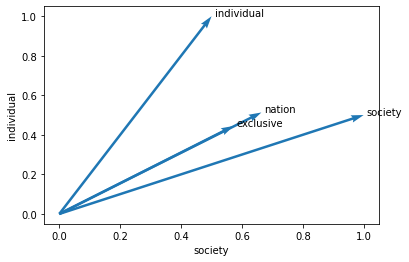

In [21]:
from whatlies import Embedding, EmbeddingSet
emb_w2v = EmbeddingSet.from_names_X(names=w2v_model1.wv.index_to_key,
                                    X=w2v_model1.wv.vectors)
(emb_w2v["society", "nation", "individual", "exclusive"]
.plot(x_axis="society",
y_axis="individual",
axis_metric="cosine_similarity"))
pass

In [22]:
word_frequency_dict = dict()
for doc in preprocessed_docs:
    for word in doc:#%%
        if not word in word_frequency_dict:
            word_frequency_dict[word]=1
        else:
            word_frequency_dict[word]+=1
total_number_word_occurrence = sum([word_frequency_dict[word] for word in word_frequency_dict.keys()])

In [23]:
def find_portion_word(word):
    if word not in word_frequency_dict:
        return 0
    else:
        return (word_frequency_dict[word]+0.0)/total_number_word_occurrence

In [26]:
print(find_portion_word('black'))
print(find_portion_word('white'))
print(find_portion_word('africa'))
print(find_portion_word('slave'))

0.0003847567766619622
0.00021951269296792376
1.6022824304228013e-06
9.753023489530094e-06
0.0003847567766619622
0.00021951269296792376
1.6022824304228013e-06
9.753023489530094e-06


EmbSet.subset(silly,smart,rich,poor,black,white)

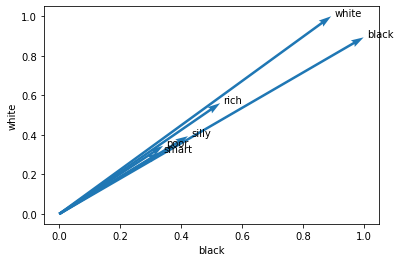

In [25]:
(emb_w2v["silly", "smart", "rich","poor","black", "white"]
.plot(x_axis="black",
y_axis="white",
axis_metric="cosine_similarity"))